# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as mpl

In [22]:
# Here we create a sample dataframe
stars = pd.read_csv("oh_table.csv")
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Run the code below to see how this works.

In [23]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
sample_df["column 1"].loc[sample_df["column 2"] == 0]

0    20
4    65
5    50
Name: column 1, dtype: int64

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [24]:
sample_df["column 1"].loc[sample_df["column 2"] == 1]


1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [25]:
sample_df["column 2"].loc[sample_df["column 1"] == 50]

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!


## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [26]:
# You will need to import numpy
import numpy as np 

In [27]:
# You can use this function in your code to find the log of distance:
#np.log10()

### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [28]:
Jdata = stars["J"].loc[stars["group_id"] == 6]
Jdata.head()

639    10.012
640     8.943
641     9.049
642     9.307
643     9.364
Name: J, dtype: float64

In [29]:
Gdata = stars["G"].loc[stars["group_id"] == 6]
Gdata.head()

639    10.988
640     9.640
641     9.780
642    10.091
643    10.221
Name: G, dtype: float64

In [30]:
GJ = Gdata - Jdata

In [31]:
'''for value in Gdata:
    print(Gdata - Jdata)
    print(GJ.head())'''

'for value in Gdata:\n    print(Gdata - Jdata)\n    print(GJ.head())'

In [32]:
distance = stars["distance"].loc[stars["group_id"] == 6]
distance.head()

639    181.036
640    185.010
641    196.198
642    176.077
643    197.704
Name: distance, dtype: float64

In [33]:
# You can use this function in your code to find the log of distance:
# np.log10()
absolute_magnitude = Gdata - 5 * np.log10(distance) + 5
absolute_magnitude.head ()

639    4.699175
640    3.304024
641    3.316527
642    3.862487
643    3.740923
dtype: float64

In [34]:
print(GJ.min())
print (GJ.max())

0.308
1.343


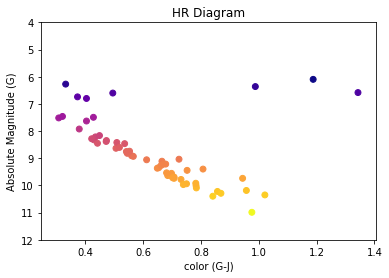

In [35]:
cm = plt.cm.get_cmap("plasma") 
plt.scatter(GJ, Gdata, c=Gdata, s=35, cmap=cm, norm=mpl.LogNorm())  
plt.ylim([4, 12])
plt.xlabel('color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('HR Diagram')
plt.gca().invert_yaxis() # This inverts the x axis so that the hottest stars are on the left.
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

In [41]:
SunJ = 3.64
SunG = 5.12
sunGJ = 1.48
import matplotlib.colors as mpl 
cm = plt.cm.get_cmap("winter")
plt.scatter(GJ, absolute_magnitude, c=Gdata, s=35, cmap=cm, norm=mpl.LogNorm())
plt.scatter(SunGJ, SunG, c='gold', s= 200, marker='o') 
plt.xlabel('G - J')
plt.ylabel('Absolute G Magnitude')
plt.title('Praesepe Cluster Color Magnitude Diagram')
plt.gca().invert_yaxis() 
plt.savefig('Praesepe Cluster Color Magnitude Diagram')
plt.show()

NameError: name 'SunGJ' is not defined

### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

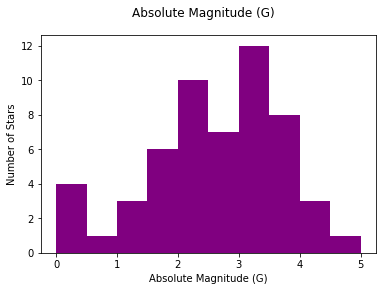

In [100]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Create a histogram
plt.hist((absolute_magnitude), 10, range = [0,5], color= "purple")

# Add a title and axis labels
plt.suptitle("Absolute Magnitude (G)")
plt.xlabel("Absolute Magnitude (G)")
plt.ylabel("Number of Stars")

# Show the graph
plt.show()

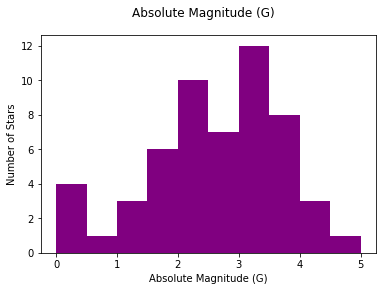

In [99]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist((absolute_magnitude), 10, range = [0,5], color= "purple")

# Add a title and axis labels
plt.suptitle("Absolute Magnitude (G)")
plt.xlabel("Absolute Magnitude (G)")
plt.ylabel("Number of Stars")

# Show the graph
plt.show()